# Fitting The GLD To Sample Data

In this notebook we will explore some of the functionality of the gldpy package. 

We asssume you have already read the [Intro to GLD Notebook](Intro%20To%20Generalized%20Lambda%20Distribution%20(GLD).ipynb)

We will do the following steps:
1. Generate a sample for a normal random variable
2. Create the GLD object
3. Fit the GLD using various fit methods


# 1. Generate a Random Varaible and Graph It

In [4]:
import numpy
import pandas
import matplotlib.pyplot as plt

In [5]:
# Generate some data
x = numpy.array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

numpy.random.seed(seed=42)
y = numpy.random.normal(loc=5, scale = 2, size=len(x)).astype(int)

We visualize the data and the distribution so we can get a sense of what the GLD results should look like

In [8]:
# Determine how many bins to use for the histogram
range_of_y_values = int(max(y) - min(y)) + 1
bin_count = range_of_y_values
print("range of y values: {0} -> {1} = {2}".format(min(y), max(y), range_of_y_values))
print("bin count: {0}".format(bin_count))

# Generate histogram data for the values of 
counts, bin_edges = numpy.histogram(y, bins=bin_count)

# Determine the midpoints of the bin
bin_widths = numpy.diff(bin_edges)
distance_from_lower_din_edge = bin_widths/2
bin_midpoints = bin_edges[:-1] + bin_widths

# Calculate the probability of the given bin
N = range_of_y_values
p = numpy.array([counts[i]/N  for i in range(0, N)])
F = p.cumsum()

range of y values: 1 -> 8 = 8
bin count: 8


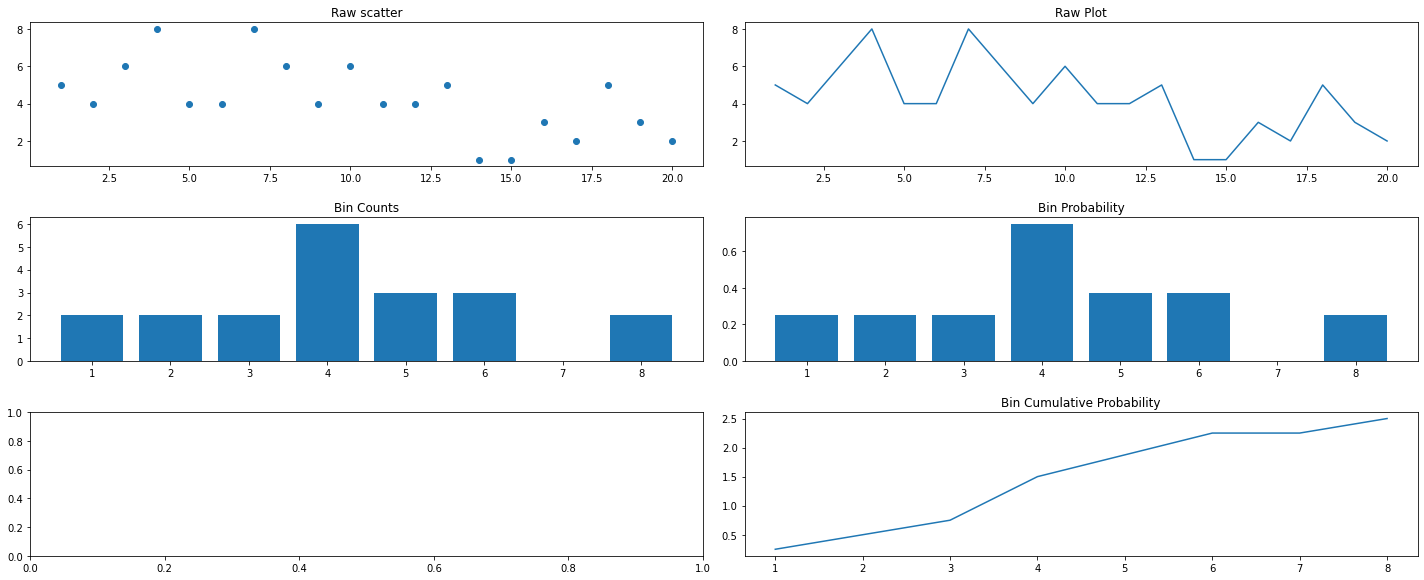

In [11]:
# Visualize the data
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 8))
fig.tight_layout(h_pad=3)
axes[0, 0].scatter(x, y)
axes[0, 0].set_title(label="Raw scatter")
axes[0, 1].plot(x, y)
axes[0, 1].set_title(label="Raw Plot")
axes[1, 0].bar(numpy.arange(min(y), max(y)+1), counts)
axes[1, 0].set_title(label="Bin Counts")
axes[1, 1].bar(numpy.arange(min(y), max(y)+1), p)
axes[1, 1].set_title(label="Bin Probability")
axes[2, 1].plot(numpy.arange(min(y), max(y)+1), F)
axes[2, 1].set_title(label="Bin Cumulative Probability");

# 2. Create the GLD object
As mentioned in the Intro To GLD notebook, there are several parameterizations to choose from. We will use the VSL parameterization.

In [13]:
from gldpy import GLD

In [15]:
# Approximate using the GLD
gld = GLD('VSL')

# 3. Use the gldpy package to fit the data
## 3.1. Explore Available Fit Methods

There are several fit methods available to calibrate the GLD to our sample data. The resulting parameter set can be returned as an array.

### 3.1.1. Fit using the Mothod of Moments

Optimization terminated successfully.
         Current function value: 0.000045
         Iterations: 44
         Function evaluations: 82

Sample moments:  (4.25, 3.6875, 0.19329743393085036, 2.588279230106291)
Fitted moments:  (4.25, 3.6874999999999996, 0.1933429277810876, 2.5883027601557127)

Parameters:  [3.8416771422937988, 3.0595677814720057, 0.5831692127390846, 0.2463756995450241]

Goodness-of-Fit
KstestResult(statistic=0.1677286350446372, pvalue=0.5701727657962407)
Power_divergenceResult(statistic=11.200000000000001, pvalue=0.13012991728403558)


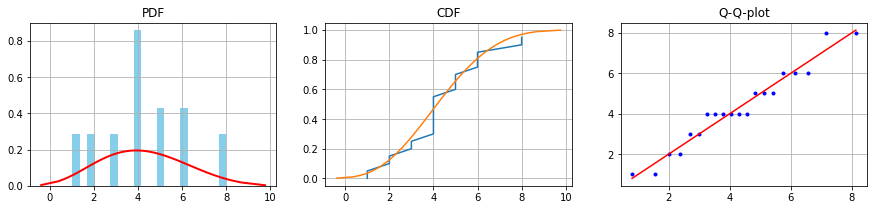

In [16]:
initial_guess = [0.5,1] # for two parameters (guessing lambda3 and lambda4)
param_MM = gld.fit_MM(y, initial_guess, bins_hist=20, maxiter=1000, maxfun=1000)

### 3.1.2. Fit using the Method of Percentiles

Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 16
         Function evaluations: 32

Sample statistics:  (4.0, 4.3000000000000025, 0.9545454545454531, 0.5232558139534881)
Fitted statistics:  (4.0, 4.3000000000000025, 0.9545454545454534, 0.5232619403753075)

Parameters:  [3.91363602 2.28334457 0.5285409  0.13095703]

Goodness-of-Fit
KstestResult(statistic=0.20000002109004117, pvalue=0.3527200505647954)
Power_divergenceResult(statistic=16.0, pvalue=0.02511636074685276)


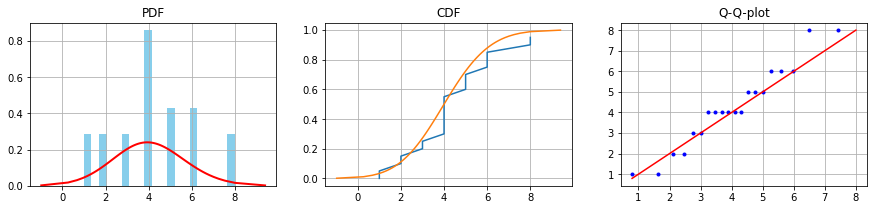

In [17]:
param_PM = gld.fit_PM(y, [1],bins_hist = 20, maxiter=1000, maxfun=1000)

### 3.1.3. Fit using the Method of L-Moments


Sample L-moments:  (4.25, 1.1236842105263158, 0.0351288056206089, 0.16701106672177068)
Fitted L-moments:  (4.25, 1.123684210526316, 0.03512880562060892, 0.16701106672177263)

Parameters:  [ 4.80269058 47.28173035  0.46489729  5.00595251]

Goodness-of-Fit
KstestResult(statistic=0.15400404311538263, pvalue=0.7028269617275931)
Power_divergenceResult(statistic=11.200000000000001, pvalue=0.13012991728403558)


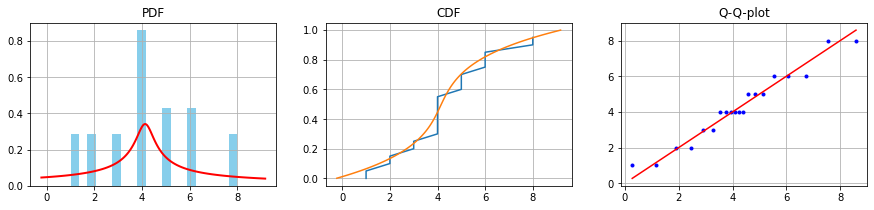

In [22]:
param_LMM = gld.fit_LMM(y,bins_hist = 20, maxiter=1000, maxfun=1000)

### 3.1.4. Fit Using Maximum Likelihood

c:\program files\python36\lib\site-packages\gldpy\_gld_module.py:166: RuntimeWarning: divide by zero encountered in power
  return param[0] + ((1 - param[2])*(y**param[3] - 1)/param[3] - param[2]*((1-y)**param[3] - 1)/param[3])*param[1]
c:\program files\python36\lib\site-packages\gldpy\_gld_module.py:166: RuntimeWarning: divide by zero encountered in double_scalars
  return param[0] + ((1 - param[2])*(y**param[3] - 1)/param[3] - param[2]*((1-y)**param[3] - 1)/param[3])*param[1]
c:\program files\python36\lib\site-packages\gldpy\_gld_module.py:166: RuntimeWarning: invalid value encountered in double_scalars
  return param[0] + ((1 - param[2])*(y**param[3] - 1)/param[3] - param[2]*((1-y)**param[3] - 1)/param[3])*param[1]
c:\program files\python36\lib\site-packages\gldpy\_gld_module.py:166: RuntimeWarning: divide by zero encountered in reciprocal
  return param[0] + ((1 - param[2])*(y**param[3] - 1)/param[3] - param[2]*((1-y)**param[3] - 1)/param[3])*param[1]
c:\program files\python36\lib\

Optimization terminated successfully.
         Current function value: 2.451367
         Iterations: 341
         Function evaluations: 720

Initial point for Maximum Likilehood Method:  [ 8.21427128 21.6428355   0.          3.        ]
Estimated by  grid

Initial negative log-likelihood function:  33.26517695369523
Optimized negative log-likelihood function: :  2.4513672325789213

Parameters:  [8.21427262e+00 2.16428257e+01 8.52552174e-13 3.00000109e+00]

Goodness-of-Fit
KstestResult(statistic=0.45204836678793175, pvalue=0.00029876697965107945)
Power_divergenceResult(statistic=22.4, pvalue=0.0021667233562080697)


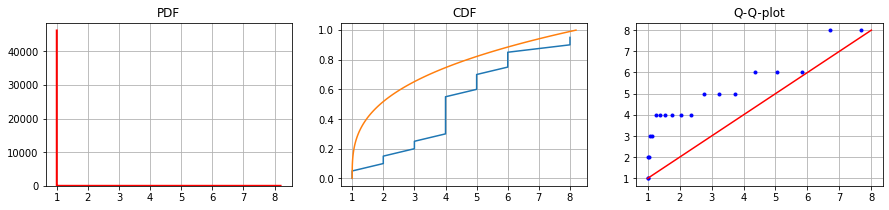

In [18]:
param_ML = gld.fit_ML(y,bins_hist = 20, maxiter=1000, maxfun=1000)

### 3.1.5. Fit Using Maximum Product Of Spacing

c:\program files\python36\lib\site-packages\gldpy\_gld_module.py:166: RuntimeWarning: divide by zero encountered in power
  return param[0] + ((1 - param[2])*(y**param[3] - 1)/param[3] - param[2]*((1-y)**param[3] - 1)/param[3])*param[1]
c:\program files\python36\lib\site-packages\gldpy\_gld_module.py:166: RuntimeWarning: divide by zero encountered in double_scalars
  return param[0] + ((1 - param[2])*(y**param[3] - 1)/param[3] - param[2]*((1-y)**param[3] - 1)/param[3])*param[1]
c:\program files\python36\lib\site-packages\gldpy\_gld_module.py:166: RuntimeWarning: invalid value encountered in double_scalars
  return param[0] + ((1 - param[2])*(y**param[3] - 1)/param[3] - param[2]*((1-y)**param[3] - 1)/param[3])*param[1]
c:\program files\python36\lib\site-packages\gldpy\_gld_module.py:1275: RuntimeWarning: divide by zero encountered in log
  return -np.mean(np.log(np.abs(np.diff(self.CDF_num(np.sort((data)),param)))))
c:\program files\python36\lib\site-packages\gldpy\_gld_module.py:166: R


Initial point for Maximum Product of Spacing Method:  [ 8.00000024e+00  2.40000247e-05  0.00000000e+00 -3.00000000e+00]
Estimated by  grid

Initial negative logarithm of mean spacing:  inf
Optimized negative logarithm of mean spacing:  inf

Parameters:  [ 8.00000024e+00  2.40000247e-05  0.00000000e+00 -3.00000000e+00]

Goodness-of-Fit
KstestResult(statistic=0.9299985566567317, pvalue=1.5965035751539953e-23)
Power_divergenceResult(statistic=124.80000000000001, pvalue=7.653760329651151e-24)


c:\program files\python36\lib\site-packages\gldpy\_gld_module.py:166: RuntimeWarning: invalid value encountered in multiply
  return param[0] + ((1 - param[2])*(y**param[3] - 1)/param[3] - param[2]*((1-y)**param[3] - 1)/param[3])*param[1]


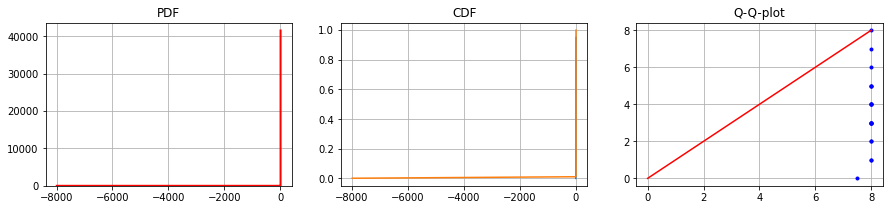

In [19]:
param_MPS = gld.fit_MPS(y ,bins_hist = 20, maxiter=1000, maxfun=1000)

### 3.1.6. Fit Using Starship Method

c:\program files\python36\lib\site-packages\gldpy\_gld_module.py:166: RuntimeWarning: divide by zero encountered in power
  return param[0] + ((1 - param[2])*(y**param[3] - 1)/param[3] - param[2]*((1-y)**param[3] - 1)/param[3])*param[1]
c:\program files\python36\lib\site-packages\gldpy\_gld_module.py:166: RuntimeWarning: divide by zero encountered in double_scalars
  return param[0] + ((1 - param[2])*(y**param[3] - 1)/param[3] - param[2]*((1-y)**param[3] - 1)/param[3])*param[1]
c:\program files\python36\lib\site-packages\gldpy\_gld_module.py:166: RuntimeWarning: invalid value encountered in double_scalars
  return param[0] + ((1 - param[2])*(y**param[3] - 1)/param[3] - param[2]*((1-y)**param[3] - 1)/param[3])*param[1]
c:\program files\python36\lib\site-packages\gldpy\_gld_module.py:166: RuntimeWarning: divide by zero encountered in reciprocal
  return param[0] + ((1 - param[2])*(y**param[3] - 1)/param[3] - param[2]*((1-y)**param[3] - 1)/param[3])*param[1]
c:\program files\python36\lib\

Optimization terminated successfully.
         Current function value: 0.364279
         Iterations: 151
         Function evaluations: 263

Initial point for Starship Method:  [ 4.91269681 21.6428355   0.44444444  3.        ]
Estimated by  grid

Initial KS-statistic:  0.7526995447622049
Optimized KS-statistic :  0.3642785320759465

Parameters:  [ 4.83111648 38.86847728  0.46092395  4.41321096]

Goodness-of-Fit
KstestResult(statistic=0.15199591532194806, pvalue=0.6894004645971719)
Power_divergenceResult(statistic=11.200000000000001, pvalue=0.13012991728403558)


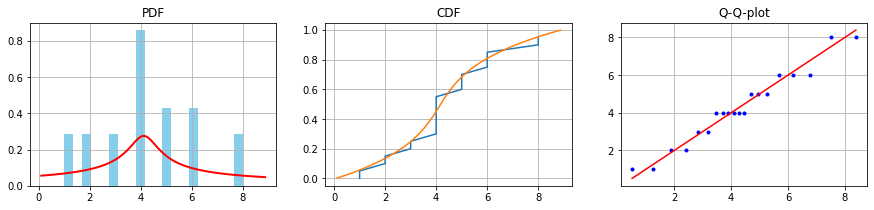

In [20]:
param_star = gld.fit_starship(y ,bins_hist = 20, maxiter=1000, maxfun=1000)

## 3.2. Accessing the values of the parameters

In [21]:
# Print out our calibrated parameters (our lambdas)
param_MM

array([3.84167714, 3.05956778, 0.58316921, 0.2463757 ])

## 3.3. Making Predictions using the GLD
We can plug arbitrary values into the GLD function and obtain the probability and cumulative probability coresponding to that point.

In our example we will calculate probabilities for the point $x=4$

In [22]:
x = 4

In [23]:
gld.PDF_num(x, param_MM)[0]

0.19489850694931166

In [24]:
gld.CDF_num(x, param_MM)[0]

0.4677286350446372